In [647]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
import decimal
import pandas as pd
from decimal import Decimal

plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Arial Unicode MS"

In [448]:
mdl = np
roots = [
    1.6319808055660636,
    0.2575302854398608,
    -1.207647827130919,
    1.4044916482153411,
    1.1525907367571583,
    -1,
    1,
    1
]
funcs = [
    lambda x: x**3 + 4*x**2 - 15,
    lambda x: x**2 - mdl.exp(x) - 3*x + 2,
    lambda x: x*mdl.exp(x**2) - mdl.sin(x)**2 + 3*mdl.cos(x) + 5,
    lambda x: mdl.sin(x)**2 - x**2 + 1,
    lambda x: mdl.log(x**2 + 7*x + 14) - x - 2,
    lambda x: (x - 4) * (x + 1)**4 / (mdl.exp(x)),
    lambda x: mdl.exp(x**2 + 11*x - 12) - 1,
    lambda x: mdl.arctan(mdl.exp(x + 3) - 1) * (x - 1)**2
]

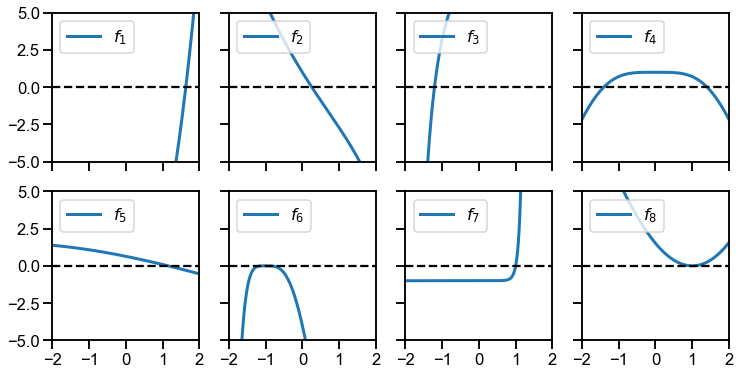

In [176]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5), 
            sharex=True, sharey=True)
sns.set_context('talk')
xmin, xmax = -2, 2
mdl = np
for i in range(8):
    ax = axes.flatten()[i]
    x = np.linspace(xmin, xmax, 1000)
    y = funcs[i](x)
    sns.lineplot(x=x, y=y, ax=ax, linewidth=3, label=rf'$f_{i+1}$')
    ax.legend(loc='upper left')
    ax.hlines(0, xmin, xmax, color='k', linestyles='--')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(-5, 5)
    # ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.subplots_adjust(left=0.05, right=0.99, bottom=0.07, top=0.98)
plt.savefig('../figure/eval-func.pdf')

In [356]:
mdl = sym
setattr(sym, 'arctan', sym.atan)
func_d1 = []
func_d2 = []
for f in funcs:
    x = sym.symbols('x')
    symf = f(x)
    func_d1.append(sym.diff(symf, x, 1))
    func_d2.append(sym.diff(symf, x, 2))

# for f in func_d1:
#     print(f"lambda x: {f},")
# print()
# for f in func_d2:
#     print(f"lambda x: {f},")

In [394]:
mdl = np
func_d1 = [
    lambda x: 3*x**2 + 8*x,
    lambda x: 2*x - np.exp(x) - 3,
    lambda x: 2*x**2*np.exp(x**2) + np.exp(x**2) - 2*np.sin(x)*np.cos(x) - 3*np.sin(x),
    lambda x: -2*x + 2*np.sin(x)*np.cos(x),
    lambda x: (2*x + 7)/(x**2 + 7*x + 14) - 1,
    lambda x: -(x - 4)*(x + 1)**4*np.exp(-x) + 4*(x - 4)*(x + 1)**3*np.exp(-x) + (x + 1)**4*np.exp(-x),
    lambda x: (2*x + 11)*np.exp(x**2 + 11*x - 12),
    lambda x: (x - 1)**2*np.exp(x + 3)/((np.exp(x + 3) - 1)**2 + 1) + (2*x - 2)*np.atan(np.exp(x + 3) - 1)
]

func_d2 = [
    lambda x: 2*(3*x + 4),
    lambda x: 2 - np.exp(x),
    lambda x: 4*x**3*np.exp(x**2) + 6*x*np.exp(x**2) + 2*np.sin(x)**2 - 2*np.cos(x)**2 - 3*np.cos(x),
    lambda x: 2*(-np.sin(x)**2 + np.cos(x)**2 - 1),
    lambda x: (-(2*x + 7)**2/(x**2 + 7*x + 14) + 2)/(x**2 + 7*x + 14),
    lambda x: (x + 1)**2*(20*x + (x - 4)*(x + 1)**2 - 8*(x - 4)*(x + 1) - 2*(x + 1)**2 - 40)*np.exp(-x),
    lambda x: ((2*x + 11)**2 + 2)*np.exp(x**2 + 11*x - 12),
    lambda x: (x - 1)**2*(np.exp(x + 3) - 2*(np.exp(x + 3) - 1)*np.exp(2*x + 6)/((np.exp(x + 3) - 1)**2 + 1))/((np.exp(x + 3) - 1)**2 + 1) + 4*(x - 1)*np.exp(x + 3)/((np.exp(x + 3) - 1)**2 + 1) + 2*np.atan(np.exp(x + 3) - 1)
]

In [702]:
np.seterr(all='raise')

def newton(f, fd, _, x):
    return x - f(x) / fd(x)


def halley(f, fd1, fd2, x):
    return x - (2 * f(x) * fd1(x)) / (2 * fd1(x)**2 - f(x)*fd2(x))


def neta(f, fd, _, x):
    w = x - f(x) / fd(x)
    z = w - f(x) / fd(x) * (f(x) - f(w)/2) / (f(x) - 5*f(w)/2)
    xn = z - f(z) / fd(x) * (f(x) - f(w)) / (f(x) - 3*f(w))
    return xn


def grau(f, fd, _, x):
    y = x - f(x) / fd(x)
    z = y - (y - x) / (2*f(y) - f(x)) * f(y)
    xn = z - (y - x) / (2*f(y) - f(x)) * f(z)
    return xn


def linz(f, fd, _, x):
    y = x - f(x) / fd(x)
    z = x - 2 * f(x) / (fd(x) + fd(y))
    xn = z - f(z) / fd(z)
    return xn


name_map = {
    newton.__name__: '牛顿',
    halley.__name__: 'Halley',
    neta.__name__: 'NM',
    grau.__name__: 'GM',
    linz.__name__: '\\textbf{本文}',
}


def coc(x0, x1, x2, x3):
    x0 = Decimal(x0)
    x1 = Decimal(x1)
    x2 = Decimal(x2)
    x3 = Decimal(x3)
    return (abs((x3 - x2) / (x2 - x1))).ln() / (abs((x2 - x1) / (x1 - x0))).ln()
    # return np.log((x3 - x2) / (x2 - x1)) / np.log((x2 - x1) / (x1 - x0))


def compute(f, fd1, fd2, x, callback, root, tol, maxiter=100):
    x0, x1, x2, x3 = x, x, x, x
    records = []
    for i in range(1, maxiter):
        try:
            tmp = x3
            x3 = callback(f, fd1, fd2, x3)
            x0 = x1
            x1 = x2
            x2 = tmp
            records.append(x3)
            if abs(x3 - x2) + abs(f(x3)) < tol:
                return i, (x0, x1, x2, x3), records
        except FloatingPointError as e:
            print(x3, x2, e, '\n')
            return -i, (x0, x1, x2, x3), records
    return -1, (x0, x1, x2, x3), records

In [588]:
mdl = np
np.seterr('ignore')
init_vals = [
    [1, 2],
    [0, 1],
    [-2, -1],
    [1, 2],
    [1, 2],
    [-1.5, -0.5],
    [0.5, 1.5],
    [0.5, 1.5]
]
# for i in [0]:# range(len(funcs)):
# print('\multirow{10}{*}{$f_' + str(i) + '$}', end='')
for initx_idx in range(2):
    for method in [newton, halley, neta, grau, linz]:
        for i in [3, 7]:
            inix = init_vals[i][initx_idx]
            iters, xs = compute(funcs[i], func_d1[i], func_d2[i], inix, method, roots[i], 1e-12, 1000)
            err = float(Decimal("{:.3g}".format(xs[3] - roots[i])))
            if abs(err) < 1e-16:
                err = '$< 10^{-16}$'
            else:
                err = f'${sym.latex(err)}$'
            if i > 3:
                print('&', end='\t')
            if method == newton:
                print(' ', '\multirow{5}{*}{' + str(inix) + '}', name_map[method.__name__], iters, err, sep='  & \t', end='')
            else:
                print(' ', ' ', name_map[method.__name__], iters, err, sep='  & \t', end='')
        print('\\\\\n')
        if method == linz:
            print('\\cline{2-5}\\cline{7-10}')
print('\\hline')

   & 	\multirow{5}{*}{1}  & 	牛顿  & 	6  & 	$< 10^{-16}$&	   & 	\multirow{5}{*}{0.5}  & 	牛顿  & 	39  & 	$-9.01 \cdot 10^{-13}$\\

   & 	   & 	Halley  & 	4  & 	$2.22 \cdot 10^{-16}$&	   & 	   & 	Halley  & 	26  & 	$-1.96 \cdot 10^{-13}$\\

   & 	   & 	NM  & 	7  & 	$2.22 \cdot 10^{-16}$&	   & 	   & 	NM  & 	-1  & 	$\text{NaN}$\\

   & 	   & 	GM  & 	3  & 	$< 10^{-16}$&	   & 	   & 	GM  & 	17  & 	$-2.18 \cdot 10^{-13}$\\

   & 	   & 	\textbf{本文}  & 	3  & 	$< 10^{-16}$&	   & 	   & 	\textbf{本文}  & 	16  & 	$-1.75 \cdot 10^{-13}$\\

\cline{2-5}\cline{7-10}
   & 	\multirow{5}{*}{2}  & 	牛顿  & 	6  & 	$< 10^{-16}$&	   & 	\multirow{5}{*}{1.5}  & 	牛顿  & 	39  & 	$9.14 \cdot 10^{-13}$\\

   & 	   & 	Halley  & 	4  & 	$2.22 \cdot 10^{-16}$&	   & 	   & 	Halley  & 	26  & 	$1.97 \cdot 10^{-13}$\\

   & 	   & 	NM  & 	7  & 	$2.22 \cdot 10^{-16}$&	   & 	   & 	NM  & 	14  & 	$-4.0$\\

   & 	   & 	GM  & 	3  & 	$< 10^{-16}$&	   & 	   & 	GM  & 	17  & 	$2.19 \cdot 10^{-13}$\\

   & 	   & 	\textbf{本文}  & 	3  & 	$< 10^{-16

In [591]:
mdl = np
np.seterr(all='raise')
init_vals = [
    [1, 2],
    [0, 1],
    [-2, -1],
    [1, 2],
    [1, 2],
    [-1.5, -0.5],
    [0.5, 1.5],
    [0.5, 1.5]
]
for i in [7]:
    for inix in init_vals[i]:
        for method in [newton, halley, neta, grau, linz]:
            # print(inix, method.__name__)
            iters, xs = compute(funcs[i], func_d1[i], func_d2[i], inix, method, roots[i], 1e-12, 1000)
            err = "{:.3g}".format(xs[3] - roots[i])
            print(i, inix, name_map[method.__name__], iters, err, sep='\t')


7	0.5	牛顿	39	-9.01e-13
7	0.5	Halley	26	-1.96e-13
-3.0 -2.999994316102505 invalid value encountered in double_scalars 

7	0.5	NM	-27	-4
7	0.5	GM	17	-2.18e-13
7	0.5	\textbf{本文}	16	-1.75e-13
7	1.5	牛顿	39	9.14e-13
7	1.5	Halley	26	1.97e-13
7	1.5	NM	14	-4
7	1.5	GM	17	2.19e-13
7	1.5	\textbf{本文}	16	1.78e-13


In [757]:
demo_df = pd.DataFrame()
for i in [6]:
    for inix in [1.5]:
        for method in [newton, halley, neta, grau, linz]:
            iters, xs, records = compute(funcs[i], func_d1[i], func_d2[i], inix, method, roots[i], 1e-12, 1000)
            err = "{:.3g}".format(xs[3] - roots[i])
            # print(i, inix, name_map[method.__name__], iters, err, sep='\t')
            # print(records)
            demo_df[name_map[method.__name__]] = pd.DataFrame(["{:.15g}".format(i) for i in records])

demo_df.index += 1
# print(demo_df.to_latex())
demo_df

-1.2755969829376932e+52 0.666554094953474 overflow encountered in exp 

1.0 1.0000000000037654 invalid value encountered in double_scalars 



,牛顿,Halley,NM,GM,\textbf{本文}
1,1.42865506283006,1.35601116577589,0.666554094953474,1.30276599634876,1.32342573635965
2,1.35671923435847,1.21112901168051,-1.27559698293769e+52,1.10991332297321,1.1477018331538
3,1.2844198112235,1.07807397692208,NaN,1.0029969564345,1.01702858946609
4,1.21240630845112,1.00617947727529,NaN,1.00000000000377,1.00000040389425
5,1.14241815947803,1.00000332721627,NaN,1,1
6,1.07872591444877,1,NaN,NaN,1
7,1.02986671328086,1,NaN,NaN,NaN
8,1.00518216043984,NaN,NaN,NaN,NaN
9,1.00017276403899,NaN,NaN,NaN,NaN
10,1.00000019615892,NaN,NaN,NaN,NaN


In [772]:
ed = 6
xs = demo_df[demo_df.columns[1]][ed-4:ed].to_numpy()
print(xs)
coc(*xs)

['1.07807397692208' '1.00617947727529' '1.00000332721627' '1']


Decimal('3.0663272046883047489602574013520276191844923826882318411411588243564935709396130368549949362722696726123863616438739707008167762104357760289640608229399689872873297406464287679372341209610272690024427')